# Chapter 2: End to End Machine Learning Project

https://www.kaggle.com/dipam7/student-grade-prediction

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
student_df = pd.read_csv("../data/student/student-mat.csv", sep=";")

In [3]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Framing the Problem

- Supervised learning
- Regression
- Multiple Regression(many features)
- Univariate Regression(predicting one feature)

## Select a Performance Measure

- Root Mean Square Error
    - The square root of the mean of the squared differences between predicted and actual

## Exploratory Data Analysis

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student_df["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [6]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


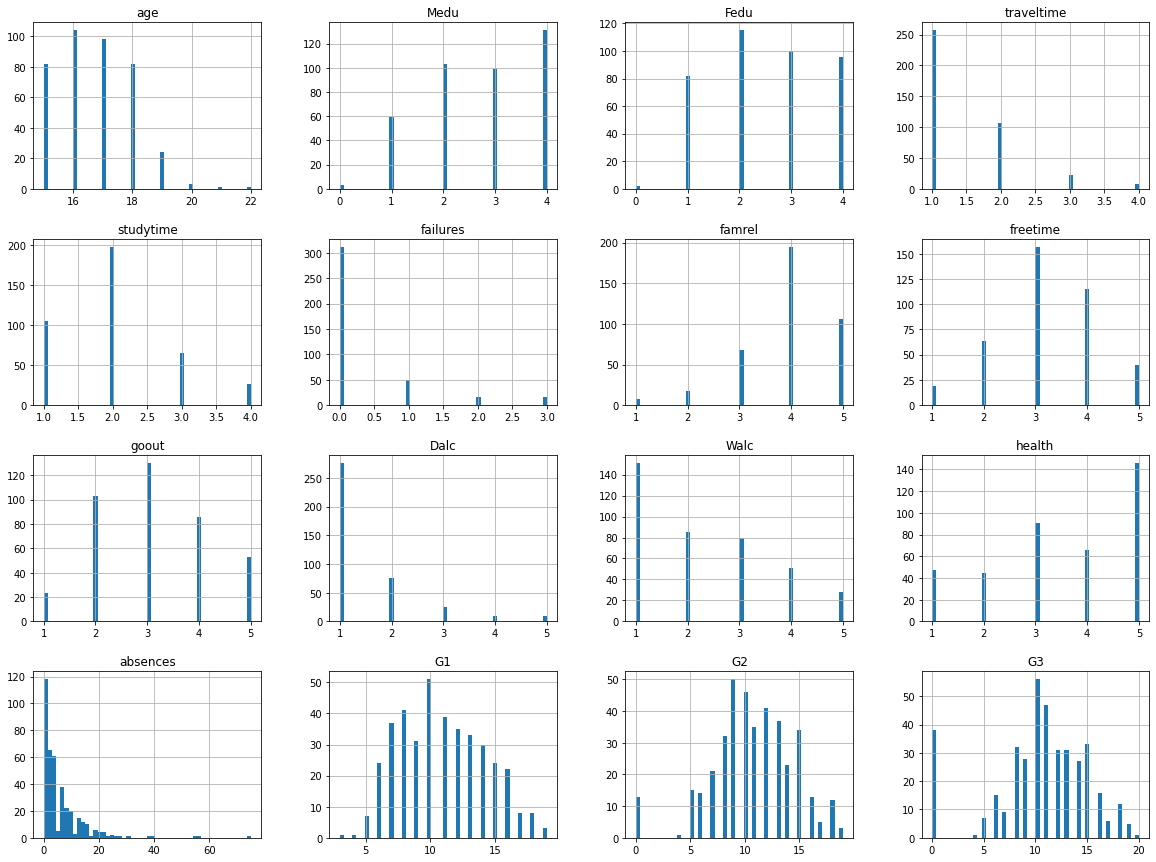

In [7]:
student_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
student_df.groupby("sex").count()

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
sex,,,,,,,,,,,,,,,,,,,,,
F,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
M,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187


In [9]:
student_df.groupby("Pstatus").count()

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Pstatus,,,,,,,,,,,,,,,,,,,,,
A,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
T,354,354,354,354,354,354,354,354,354,354,...,354,354,354,354,354,354,354,354,354,354


In [10]:
# Father's Education
student_df.groupby("Fedu").count()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
2,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96


In [11]:
# Mother's Education
student_df.groupby("Medu").count()

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Medu,,,,,,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
3,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
4,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131


## Create a Testset

- You can use hashing so that your test set will be consistent even if you update your dataset.
- Make sure that everytime you get a test train split, it will be the same split
    - you can seed it with `np.random.seed(42)`

### Using a random 20% of the dataset and setting it aside

In [12]:
import numpy as np

In [13]:
def split_train_test(data, test_ratio, seed=42):
    np.random.seed(42)
    # Shuffle the indexes 
    shuffled_indices = np.random.permutation(len(data))
    # Calculate how much needed in test set
    test_set_size = int(len(data) * test_ratio)
    # Get a slice of test and train
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # Return train and test set
    return data.loc[train_indices], data.iloc[test_indices]

In [14]:
student_train, student_test = split_train_test(student_df, 0.2)

In [15]:
student_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,15,U,GT3,T,4,2,other,other,...,3,3,3,1,1,3,0,10,10,10
106,GP,F,15,U,GT3,T,2,2,other,other,...,5,1,2,1,1,3,8,7,8,8
270,GP,F,19,U,GT3,T,3,3,other,services,...,4,3,5,3,3,5,15,9,9,9
348,GP,F,17,U,GT3,T,4,3,health,other,...,4,4,3,1,3,4,0,13,15,15


In [16]:
student_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,12,11,12
82,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
114,GP,M,15,R,GT3,T,2,1,health,services,...,5,4,2,1,1,5,8,9,9,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


### Using instance identifier

- the current solution will generate a new dataset when ran again.
    - overtime the model will see all the data, which should be avoided
    - you could seed the random, but this will break once you've updata the data set
- Instead, you can use each instance's identifier to decide if it goes in the test or train set
    - You can calculate the hash of each identifier and put the hashes lower than 20% of the max

In [17]:
from zlib import crc32

In [18]:
def test_set_check(identifier, testratio):
    # Getting all the indexed that are below the total hash * test ratio
    return crc32(np.int64(identifier)) & 0xffffffff < testratio * 2**32

In [19]:
def split_train_test_by_id(data, test_ratio, id_column):
    # Pandas series of each rows id/index
    ids = data[id_column]
    # Getting the indexes that are above/below the total hash
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    # Slicing the data by indexes
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
student_df_id = student_df.reset_index()

In [21]:
train_set, test_set = split_train_test_by_id(student_df_id, 0.2, "index")

In [22]:
train_set

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
6,6,GP,M,16,U,LE3,T,2,2,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,389,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,0,6,5,0
390,390,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
391,391,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
392,392,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7


In [23]:
test_set

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
5,5,GP,M,16,U,LE3,T,4,3,services,...,5,4,2,1,2,5,10,15,15,15
12,12,GP,M,15,U,LE3,T,4,4,health,...,4,3,3,1,3,5,2,14,14,14
16,16,GP,F,16,U,GT3,T,4,4,services,...,3,2,3,1,2,2,6,13,14,14
23,23,GP,M,16,U,LE3,T,2,2,other,...,5,4,4,2,4,5,0,13,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,373,MS,F,17,R,GT3,T,1,2,other,...,3,5,5,1,3,1,14,6,5,5
379,379,MS,F,17,R,GT3,T,3,1,at_home,...,4,5,4,2,3,1,17,10,10,10
387,387,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,0,7,5,0
388,388,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,0,7,9,8


- You can either add an index column or use a unique identifier that won't change
- If you use the row index, make sure that the new data gets appended to the bottom, and that no row ever gets deleted

### With Sklearn

- sklearn's `train_test_split` does more than the function we defined earlier
    - has a `random_state` parameter that allows you set the random generator seed
    - you can pass it multiple datasets with identical number of rows, and will split them the same way

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_student, test_student = train_test_split(student_df, test_size=0.2, random_state=42)

In [26]:
train_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,15,U,GT3,T,4,2,other,other,...,3,3,3,1,1,3,0,10,10,10
106,GP,F,15,U,GT3,T,2,2,other,other,...,5,1,2,1,1,3,8,7,8,8
270,GP,F,19,U,GT3,T,3,3,other,services,...,4,3,5,3,3,5,15,9,9,9
348,GP,F,17,U,GT3,T,4,3,health,other,...,4,4,3,1,3,4,0,13,15,15


In [27]:
test_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,12,11,12
82,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
114,GP,M,15,R,GT3,T,2,1,health,services,...,5,4,2,1,1,5,8,9,9,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


## Stratified Sampling

- stratified sampling
    - sampling that tries to get the same ratio of a certain feature as the population
- Make sure to have enough instances in each strata
    - Don't have too many strata

### Counting how many absences per group

<AxesSubplot:>

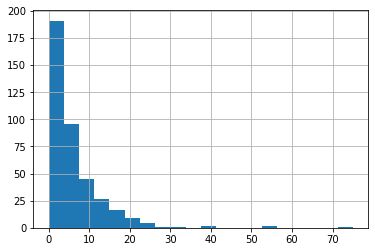

In [28]:
student_df["absences"].hist(bins=20)

### Filling the Nan's with the Mean

In [29]:
# Filling all the Nans with mean in a different dataset, and getting the new absences column
student_df["absences_filled"] = student_df.fillna(student_df.mean())["absences"]

### Creating groups based on counts

In [30]:
# First bin is -0.5 because it will not put 0 in any of the bins
student_df["absences_cat"] =  pd.cut(student_df["absences_filled"], 
                                     bins=[-0.5, 1, 3, 5, 7, np.inf],
                                     labels=[1.0, 2.0, 3.0, 4.0, 5.0])

<AxesSubplot:>

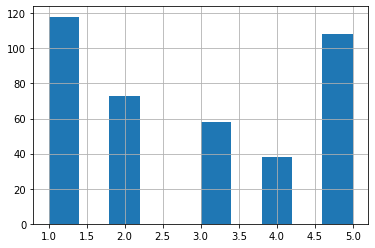

In [31]:
student_df["absences_cat"].hist()

### Stratifying

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [34]:
for train_index, test_index in split.split(student_df, student_df["absences_cat"]):
    strat_train_set = student_df.loc[train_index]
    strat_test_set = student_df.loc[test_index]

In [35]:
strat_train_set["absences_cat"].value_counts() / len(strat_train_set)

1.0    0.300633
5.0    0.275316
2.0    0.183544
3.0    0.145570
4.0    0.094937
Name: absences_cat, dtype: float64

In [36]:
strat_test_set["absences_cat"].value_counts() / len(strat_test_set)

1.0    0.291139
5.0    0.265823
2.0    0.189873
3.0    0.151899
4.0    0.101266
Name: absences_cat, dtype: float64

## Remove the category label so that the data is back to where it was

In [37]:
strat_train_set = strat_train_set.drop("absences_cat", axis=1, errors='ignore')
strat_train_set = strat_train_set.drop("absences", axis=1, errors='ignore')

strat_test_set = strat_test_set.drop("absences_cat", axis=1, errors='ignore')
strat_test_set = strat_test_set.drop("absences", axis=1, errors='ignore')


In [38]:
strat_test_set

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_filled
290,GP,M,18,U,GT3,T,4,2,teacher,other,...,4,3,2,1,4,5,12,11,11,11
296,GP,F,19,U,GT3,T,4,4,health,other,...,2,3,4,2,3,2,10,9,0,0
66,GP,M,15,U,GT3,A,4,4,other,services,...,1,3,3,5,5,3,13,13,12,4
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,18,19,19,10
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,2,5,1,5,4,9,8,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,GP,F,16,U,LE3,T,2,2,services,services,...,4,3,3,2,3,4,12,13,13,2
219,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,1,4,9,10,10,4
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,8,9,8,0
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,7,10,10,2


## Discover and Visualize the Data to Gain Insights

In [39]:
## Create a copy of training set so that you don't edit it
training_df = strat_train_set.copy()

## Looking for Correlations

- This measures linear correlation and may miss other types of relationships

In [45]:
corr_matrix = training_df.corr()

In [46]:
corr_matrix["Medu"].sort_values()

failures          -0.251407
age               -0.236457
traveltime        -0.123745
health            -0.039657
Walc              -0.011851
freetime           0.015685
famrel             0.031606
studytime          0.034071
goout              0.052337
Dalc               0.053090
absences_filled    0.094103
G1                 0.228222
G2                 0.232332
G3                 0.248046
Fedu               0.604106
Medu               1.000000
Name: Medu, dtype: float64

In [47]:
corr_matrix["G1"].sort_values()

failures          -0.355039
goout             -0.127080
Walc              -0.114070
Dalc              -0.100525
age               -0.093530
traveltime        -0.090103
health            -0.069329
absences_filled   -0.029168
freetime           0.023669
famrel             0.051890
studytime          0.174952
Medu               0.228222
Fedu               0.238270
G3                 0.795004
G2                 0.843684
G1                 1.000000
Name: G1, dtype: float64

In [48]:
from pandas.plotting import scatter_matrix

In [49]:
training_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G1', 'G2', 'G3', 'absences_filled'],
      dtype='object')

In [55]:
attributes = ['Medu', 'Fedu', 'traveltime', 'famrel', 'freetime']
              
             
             

In [57]:
 ['Dalc', 'Walc', 'health'] 'studytime', 'failures', , 'goout', , 'G1', 'G2', 'G3', 'absences_filled']

SyntaxError: invalid syntax (<ipython-input-57-35bd09fd812c>, line 1)

array([[<AxesSubplot:xlabel='Medu', ylabel='Medu'>,
        <AxesSubplot:xlabel='Fedu', ylabel='Medu'>,
        <AxesSubplot:xlabel='traveltime', ylabel='Medu'>,
        <AxesSubplot:xlabel='famrel', ylabel='Medu'>,
        <AxesSubplot:xlabel='freetime', ylabel='Medu'>],
       [<AxesSubplot:xlabel='Medu', ylabel='Fedu'>,
        <AxesSubplot:xlabel='Fedu', ylabel='Fedu'>,
        <AxesSubplot:xlabel='traveltime', ylabel='Fedu'>,
        <AxesSubplot:xlabel='famrel', ylabel='Fedu'>,
        <AxesSubplot:xlabel='freetime', ylabel='Fedu'>],
       [<AxesSubplot:xlabel='Medu', ylabel='traveltime'>,
        <AxesSubplot:xlabel='Fedu', ylabel='traveltime'>,
        <AxesSubplot:xlabel='traveltime', ylabel='traveltime'>,
        <AxesSubplot:xlabel='famrel', ylabel='traveltime'>,
        <AxesSubplot:xlabel='freetime', ylabel='traveltime'>],
       [<AxesSubplot:xlabel='Medu', ylabel='famrel'>,
        <AxesSubplot:xlabel='Fedu', ylabel='famrel'>,
        <AxesSubplot:xlabel='traveltime', y

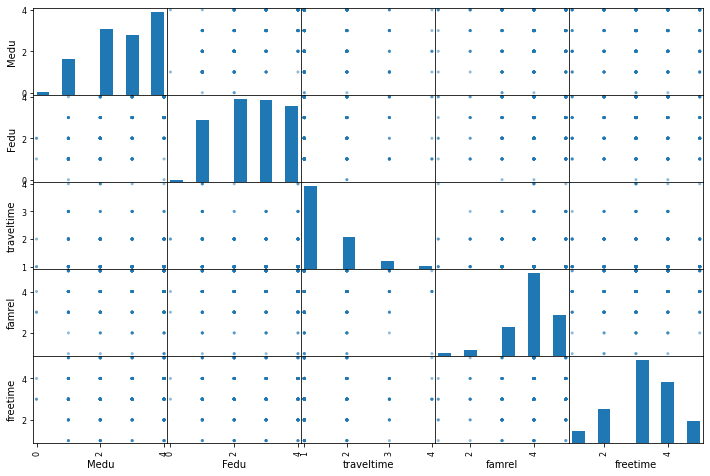

In [56]:
scatter_matrix(training_df[attributes], figsize=(12,8))